<h1> Homework 9: Numerical Differentiaon Equations II <h1>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## Problem 1

The volume of an 𝑛-dimensional sphere is given by

$$
V_n(R)=\frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2}+1\right)}R^n
$$

Use a Monte Carlo method to estimate the coefficient of $R^n$ in this relation and compare to the analytic expression.

In [11]:
np.random.seed(42)

def get_coef(n, iterations = 10000):
    in_sphere = 0
    for i in range(iterations):
        vector = np.random.uniform(-1, 1, n)
        r = np.linalg.norm(vector)
        if r <= 1:
            in_sphere += 1
    coef = in_sphere / iterations * 2**n
    return coef

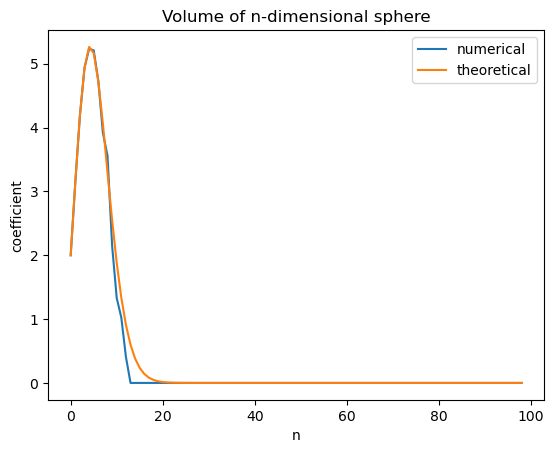

In [17]:
# get coefficients for n and compare with theoretical value
coefs_numerical = np.array([get_coef(n, 20000) for n in range(1, 100)])
coefs_theoretical = np.array([np.pi**(n/2) / sp.gamma(n/2 + 1) for n in range(1, 100)])

# plot the results
plt.plot(coefs_numerical, label = 'numerical')
plt.plot(coefs_theoretical, label = 'theoretical')
plt.xlabel('n')
plt.ylabel('coefficient')
plt.title('Volume of n-dimensional sphere')
plt.legend()
plt.show()

Upon plotting the numerical and theoretical values, we see that they agree closely.

## Problem 2

Implement the one dimensional random walk problem and verify that the distance traveled $d(n)$ scales as $\sqrt{n}$ with the number of steps $n$.

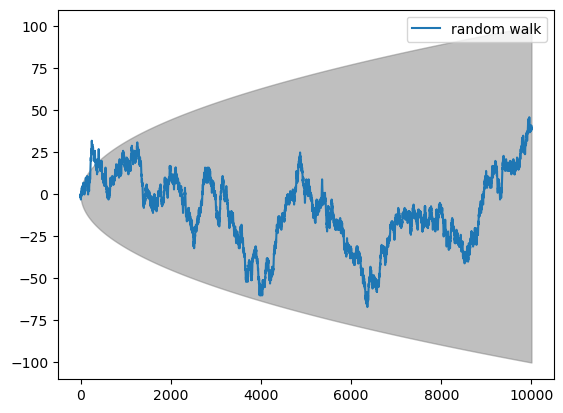

In [26]:
# random walk

def random_walk(steps = 1000):
    path = np.zeros(steps)
    for i in range(1, steps):
        path[i] = path[i-1] + np.random.choice([-1, 1])
    plt.plot(path, label = 'random walk')
    # shade the area between ±sqrt(n)
    plt.fill_between(range(steps), -np.sqrt(range(steps)), np.sqrt(range(steps)), color = 'grey', alpha = 0.5)
    plt.legend()
    plt.show()
    return path

r = random_walk(10000)

## Problem 3

Write a function **betadev(a,b)** that generates a random number with *Beta distribution* using two Gamma distributions. You can use the relevant packages in Python to generate random numbers with Gamma distributions (i.e. **numpy.random.gamma)**.

The Beta distribution is parametrized by two constants and takes the form

$$
\beta(z; a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}z^{a-1} (1-z)^{b-1}
$$

This distribution can be obtained from the Gamma distribution as follows

$$
z \sim \frac{x}{x+y}
$$

where we have $\beta(z;a,b)$ if $x$ and $y$ are random numbers with distributions given by $\Gamma(x; a, 1)$ and $\Gamma(y; b, 1)$ respectively. Verify the distribution with a histogram.

In [30]:
def betadev(a,b):
    x = np.random.gamma(a, 1)
    y = np.random.gamma(b, 1)
    z = x/(x+y)
    return sp.gamma(a+b)/(sp.gamma(a)*sp.gamma(b))*z**(a-1)*(1-z)**(b-1)